In [1]:
import os
import numpy as np
import netCDF4 as netcdf4
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.units as munits
import cmaps  # for NCL colormaps
import cartopy.crs as ccrs
import cftime
import datetime
from matplotlib.dates import ConciseDateConverter
munits.registry[cftime.DatetimeNoLeap] = ConciseDateConverter()

In [2]:
def ann_mean(ds):
    """
    Description: compute the annual mean of a variable 
    Argument:
       ds: variable
    Return:
       ds_ann: annual mean
    """
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    ds_ann = (ds*wgts).groupby("time.year").sum()
    return ds_ann

In [3]:
def global_mean(ds, lat):
    """
    Description: compute the global mean (weigthed) of a variable 
    Argument:
       ds: variable
    Return:
       ds_mean: global mean
    """
    weights = np.cos(np.deg2rad(lat))
    ds_weigthed = ds.weighted(weights)
    ds_mean = ds_weigthed.mean(('lat','lon'))
    return ds_mean

In [ ]:
import dask
from dask.distributed import wait
dask.__version__

In [ ]:
# Use this if computing annual means:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=1,
        memory='10GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=10GB',
        project='NCGD0011',
        walltime='02:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status',
        'array.slicing.split_large_chunks': True
    })
    client = Client(cluster)
    return cluster, client

cluster, client = get_ClusterClient()
cluster.scale(jobs=30) 

In [5]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-control.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-control.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_PI_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_PI_1['time'] = Temp_PI_1.time - datetime.timedelta(15) #middle of the month

In [6]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-rampup.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-rampup.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_rampup_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_rampup_1['time'] = Temp_rampup_1.time - datetime.timedelta(15) #middle of the month

In [7]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-noemissions116.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-noemissions116.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_zec2c_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_zec2c_1['time'] = Temp_zec2c_1.time - datetime.timedelta(15) #middle of the month

In [8]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-amazoncollapse166.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-amazoncollapse166.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_amazoncollapse2c_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_amazoncollapse2c_1['time'] = Temp_amazoncollapse2c_1.time - datetime.timedelta(15) #middle of the month

In [9]:
Temp_PI_1_ann = ann_mean(global_mean(Temp_PI_1, Temp_PI_1.lat))

In [10]:
Temp_PI_1_ann_mean166 = ann_mean(Temp_PI_1.TREFHT[215*12:265*12+1,:,:])

In [11]:
Temp_rampup_1_ann = ann_mean(global_mean(Temp_rampup_1, Temp_rampup_1.lat)).load()

In [12]:
Temp_zec2c_1_ann = ann_mean(global_mean(Temp_zec2c_1, Temp_zec2c_1.lat)).load()

In [13]:
Temp_zec2c_1_ann_mean166 = ann_mean(Temp_zec2c_1.TREFHT[100*12:150*12+1,:,:])

In [14]:
Temp_amazoncollapse2c_1_ann = ann_mean(global_mean(Temp_amazoncollapse2c_1, Temp_amazoncollapse2c_1.lat)).load()

In [15]:
Temp_amazoncollapse2c_1_ann_mean166 = ann_mean(Temp_amazoncollapse2c_1.TREFHT[50*12:100*12+1,:,:])

In [16]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-control.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-control.001.cam.h0.PRECT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["PRECT"]]

Precip_PI_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Precip_PI_1['time'] = Precip_PI_1.time - datetime.timedelta(15) #middle of the month

In [17]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-rampup.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-rampup.001.cam.h0.PRECT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["PRECT"]]

Precip_rampup_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Precip_rampup_1['time'] = Precip_rampup_1.time - datetime.timedelta(15) #middle of the month

In [18]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-noemissions116.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-noemissions116.001.cam.h0.PRECT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["PRECT"]]

Precip_zec2c_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Precip_zec2c_1['time'] = Precip_zec2c_1.time - datetime.timedelta(15) #middle of the month

In [19]:
dir = '/glade/campaign/cesm/collections/CESM2-TIPESM/b.e21.B1850.f09_g17.tipesm-amazoncollapse166.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.tipesm-amazoncollapse166.001.cam.h0.PRECT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["PRECT"]]

Precip_amazoncollapse2c_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Precip_amazoncollapse2c_1['time'] = Precip_amazoncollapse2c_1.time - datetime.timedelta(15) #middle of the month

In [20]:
Precip_PI_1_ann = ann_mean(global_mean(Precip_PI_1, Precip_PI_1.lat))

In [21]:
Precip_PI_1_ann_mean166 = ann_mean(Precip_PI_1.PRECT[215*12:265*12+1,:,:])

In [22]:
Precip_rampup_1_ann = ann_mean(global_mean(Precip_rampup_1, Precip_rampup_1.lat)).load()

In [23]:
Precip_zec2c_1_ann = ann_mean(global_mean(Precip_zec2c_1, Precip_zec2c_1.lat)).load()

In [24]:
Precip_zec2c_1_ann_mean166 = ann_mean(Precip_zec2c_1.PRECT[100*12:150*12+1,:,:])

In [25]:
Precip_amazoncollapse2c_1_ann = ann_mean(global_mean(Precip_amazoncollapse2c_1, Precip_amazoncollapse2c_1.lat)).load()

In [26]:
Precip_amazoncollapse2c_1_ann_mean166 = ann_mean(Precip_amazoncollapse2c_1.PRECT[50*12:100*12+1,:,:])

In [43]:
TreeCoverFileName = "/glade/work/lawrence/cesmtipesm2025/tipesm-landcover/tipesm-amazoncollapse166/landuse_timeseries_0.9x1.25_TIPESMAmazonCollapse_78pfts_CLM5_simyr0166-0300_c250320.nc"
TreeCoverInputFile = netcdf4.Dataset(TreeCoverFileName,'r')
PCT_NAT_PFT = np.asarray(TreeCoverInputFile.variables["PCT_NAT_PFT"][0,:,:,:],np.float64)
LANDFRAC_PFT = np.asarray(TreeCoverInputFile.variables["LANDFRAC_PFT"][:,:],np.float64)

PCT_Tree_PFT = PCT_NAT_PFT[1:9,:,:].sum(axis=0) * LANDFRAC_PFT


Text(0.5, 1.0, 'Surface Temp')

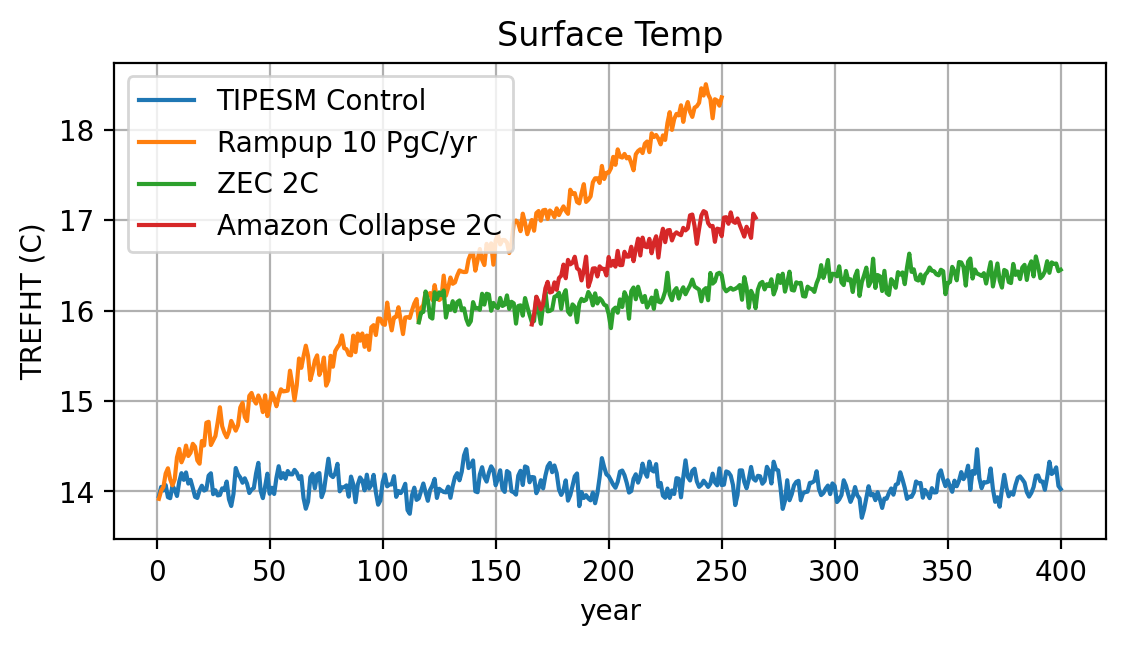

In [44]:
plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(400/5*0.5)
plt.plot(Temp_PI_1_ann.year[0:400], Temp_PI_1_ann.TREFHT[0:400]-273.15, label='TIPESM Control')
plt.plot(Temp_rampup_1_ann.year, Temp_rampup_1_ann.TREFHT-273.15, label='Rampup 10 PgC/yr')
plt.plot(Temp_zec2c_1_ann.year[0:285], Temp_zec2c_1_ann.TREFHT[0:285]-273.15, label='ZEC 2C')
plt.plot(Temp_amazoncollapse2c_1_ann.year, Temp_amazoncollapse2c_1_ann.TREFHT-273.15, label='Amazon Collapse 2C')

plt.legend()

plt.xlabel('year')
plt.ylabel('TREFHT (C)')
plt.grid()
plt.title('Surface Temp')

Text(0.5, 1.0, 'Total Precip')

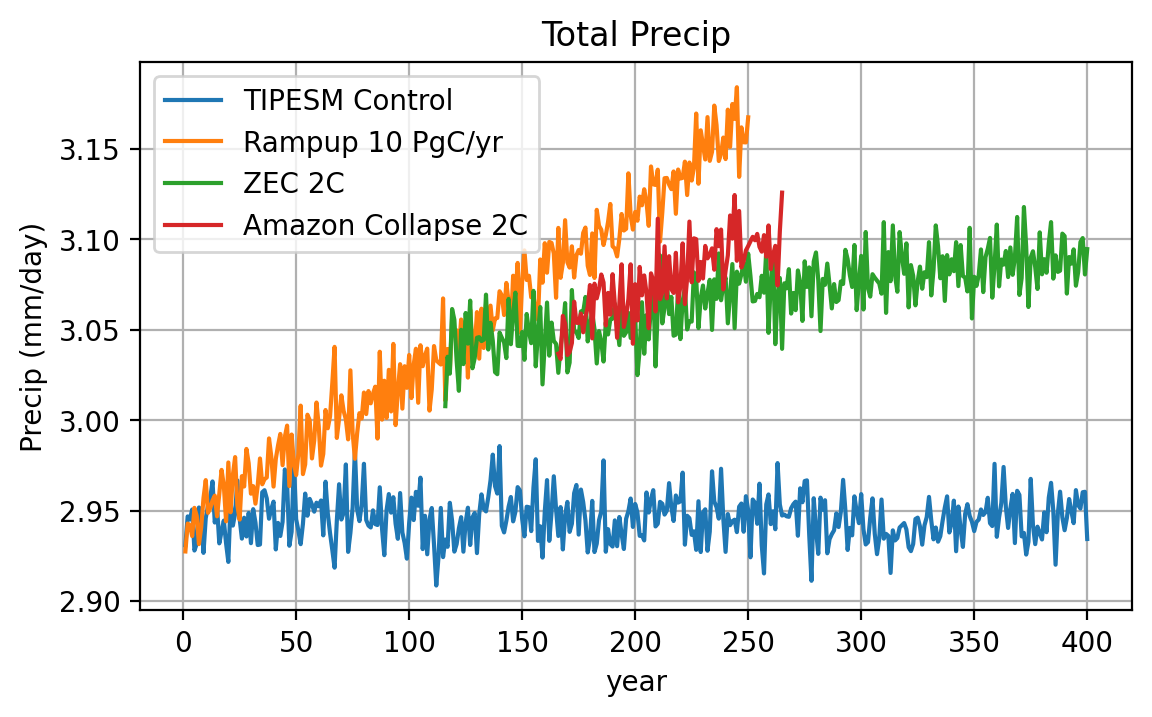

In [45]:
plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(400/0.25*0.5)
plt.plot(Precip_PI_1_ann.year[0:400], Precip_PI_1_ann.PRECT[0:400]*8.64e7, label='TIPESM Control')
plt.plot(Precip_rampup_1_ann.year, Precip_rampup_1_ann.PRECT*8.64e7, label='Rampup 10 PgC/yr')
plt.plot(Precip_zec2c_1_ann.year[0:285], Precip_zec2c_1_ann.PRECT[0:285]*8.64e7, label='ZEC 2C')
plt.plot(Precip_amazoncollapse2c_1_ann.year, Precip_amazoncollapse2c_1_ann.PRECT*8.64e7, label='Amazon Collapse 2C')

plt.legend()

plt.xlabel('year')
plt.ylabel('Precip (mm/day)')
plt.grid()
plt.title('Total Precip')

In [46]:
Temp_amazoncollapse2c_1_ann_meandiff216 = (Temp_amazoncollapse2c_1_ann_mean166 - Temp_zec2c_1_ann_mean166)

In [47]:
Temp_contour_levels = [ -50, -40, -30, -20, -10, -5, -2.5, 0, 2.5, 5, 10, 15, 20, 25, 30, 35, 40 ]
Temp_color_map = cmaps.WhBlGrYeRe

In [48]:
Tree_contour_levels = [0, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
Tree_color_map = cmaps.WhiteGreen

In [49]:
TempDiff_contour_levels = [-6, -5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, 4, 5, 6]
TempDiff_color_map = cmaps.ncl_default

In [50]:
lats = Temp_zec2c_1_ann_mean166.lat
lons = Temp_zec2c_1_ann_mean166.lon
lonsdim = len(lons)
lonsshift = np.arange(-0.625,0.625,1.25/float(lonsdim))
lons = lons + lonsshift


In [51]:
figWidth = 15
figHeight = 8
nplot_rows = 2
nplot_cols = 2
TempAmazon_data = Temp_amazoncollapse2c_1_ann_mean166.mean(dim='year') - 273.15
Tree_data = PCT_Tree_PFT
TempZec_data = Temp_zec2c_1_ann_mean166.mean(dim='year') - 273.15
TempDiff_data = Temp_amazoncollapse2c_1_ann_meandiff216.mean(dim='year')

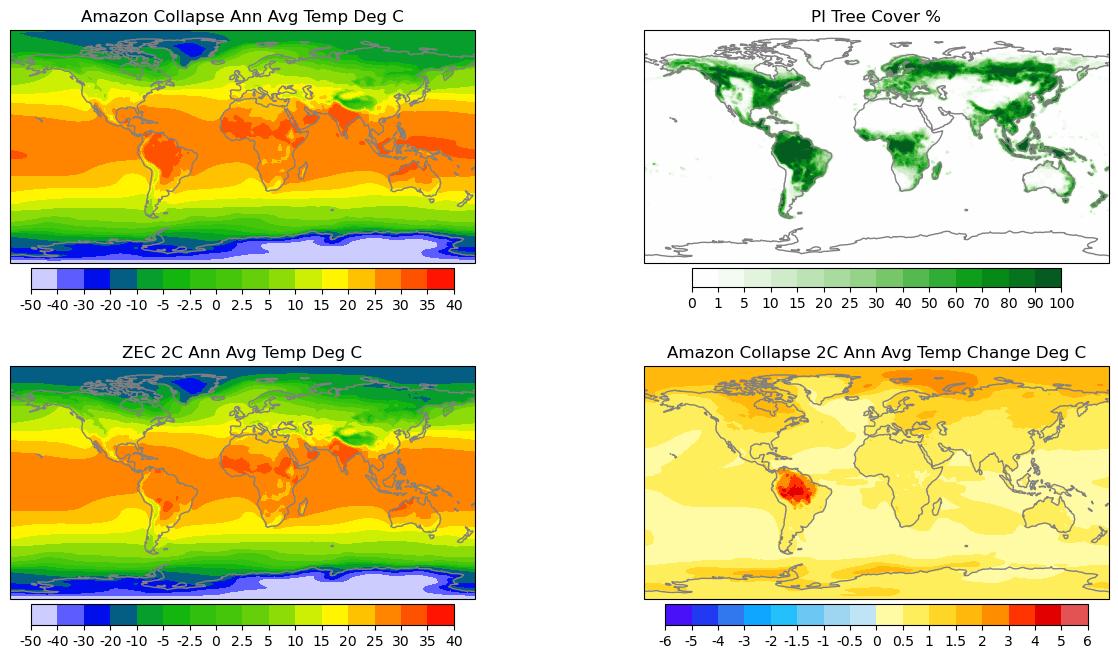

In [52]:
TempAmazon_plot_label = "Amazon Collapse Ann Avg Temp Deg C"
Tree_plot_label = "PI Tree Cover %"
TempZec_plot_label = "ZEC 2C Ann Avg Temp Deg C"
TempDiff_plot_label = "Amazon Collapse 2C Ann Avg Temp Change Deg C"

Temp_fig = plt.figure(figsize=(figWidth,figHeight))

TempAmazon_plot_index = 1
Tree_plot_index = 2
TempZec_plot_index = 3
TempDiff_plot_index = 4

TempAmazon_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, TempAmazon_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
TempAmazon_cplot = plt.contourf(lons, lats, TempAmazon_data,
                     levels = Temp_contour_levels,
                     cmap = Temp_color_map)
TempAmazon_ax.coastlines(color = 'grey')
TempAmazon_ax.title.set_text(TempAmazon_plot_label)

TempAmazon_cbar = Temp_fig.colorbar(TempAmazon_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
TempAmazon_cbar.set_ticks(Temp_contour_levels)
TempAmazon_cbar.set_ticklabels(Temp_contour_levels)

Tree_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, Tree_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
Tree_cplot = plt.contourf(lons, lats, Tree_data,
                     levels = Tree_contour_levels,
                     cmap = Tree_color_map)
Tree_ax.coastlines(color = 'grey')
Tree_ax.title.set_text(Tree_plot_label)

Tree_cbar = Temp_fig.colorbar(Tree_cplot, orientation='horizontal', shrink = 0.7, pad = 0.02)
Tree_cbar.set_ticks(Tree_contour_levels)
Tree_cbar.set_ticklabels(Tree_contour_levels)

TempZec_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, TempZec_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
TempZec_cplot = plt.contourf(lons, lats, TempZec_data,
                     levels = Temp_contour_levels,
                     cmap = Temp_color_map)
TempZec_ax.coastlines(color = 'grey')
TempZec_ax.title.set_text(TempZec_plot_label)

TempZec_cbar = Temp_fig.colorbar(TempZec_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
TempZec_cbar.set_ticks(Temp_contour_levels)
TempZec_cbar.set_ticklabels(Temp_contour_levels)

TempDiff_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, TempDiff_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
TempDiff_cplot = plt.contourf(lons, lats, TempDiff_data,
                     levels = TempDiff_contour_levels,
                     cmap = TempDiff_color_map)
TempDiff_ax.coastlines(color = 'grey')
TempDiff_ax.title.set_text(TempDiff_plot_label)

TempDiff_cbar = Temp_fig.colorbar(TempDiff_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
TempDiff_cbar.set_ticks(TempDiff_contour_levels)
TempDiff_cbar.set_ticklabels(TempDiff_contour_levels)

In [53]:
Precip_amazoncollapse2c_1_ann_meandiff216 = (Precip_amazoncollapse2c_1_ann_mean166 - Precip_zec2c_1_ann_mean166)

In [54]:
Precip_contour_levels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Precip_color_map = cmaps.WhBlGrYeRe

In [55]:
# PrecipDiff_contour_levels = [-5, -2.5, -1.5, -1, -0.75, -0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2.5, 5]
PrecipDiff_contour_levels = [-100, -50, -25, -20, -15, -10, -5, -2.5, 0, 2.5, 5, 10, 15, 20, 25, 50, 100]
PrecipDiff_color_map = cmaps.ncl_default
PrecipDiff_color_map_reversed = PrecipDiff_color_map.reversed()

In [56]:
lats = Precip_zec2c_1_ann_mean166.lat
lons = Precip_zec2c_1_ann_mean166.lon
lonsdim = len(lons)
lonsshift = np.arange(-0.625,0.625,1.25/float(lonsdim))
lons = lons + lonsshift


In [57]:
figWidth = 15
figHeight = 8
nplot_rows = 2
nplot_cols = 2
PrecipAmazon_data = Precip_amazoncollapse2c_1_ann_mean166.mean(dim='year')*8.64e7
Tree_data = PCT_Tree_PFT
PrecipZec_data = Precip_zec2c_1_ann_mean166.mean(dim='year')*8.64e7
PrecipDiff_data = Precip_amazoncollapse2c_1_ann_meandiff216.mean(dim='year')*8.64e7
PrecipDiffPercent_data = Precip_amazoncollapse2c_1_ann_meandiff216.mean(dim='year') / Precip_PI_1_ann_mean166.mean(dim='year') * 100

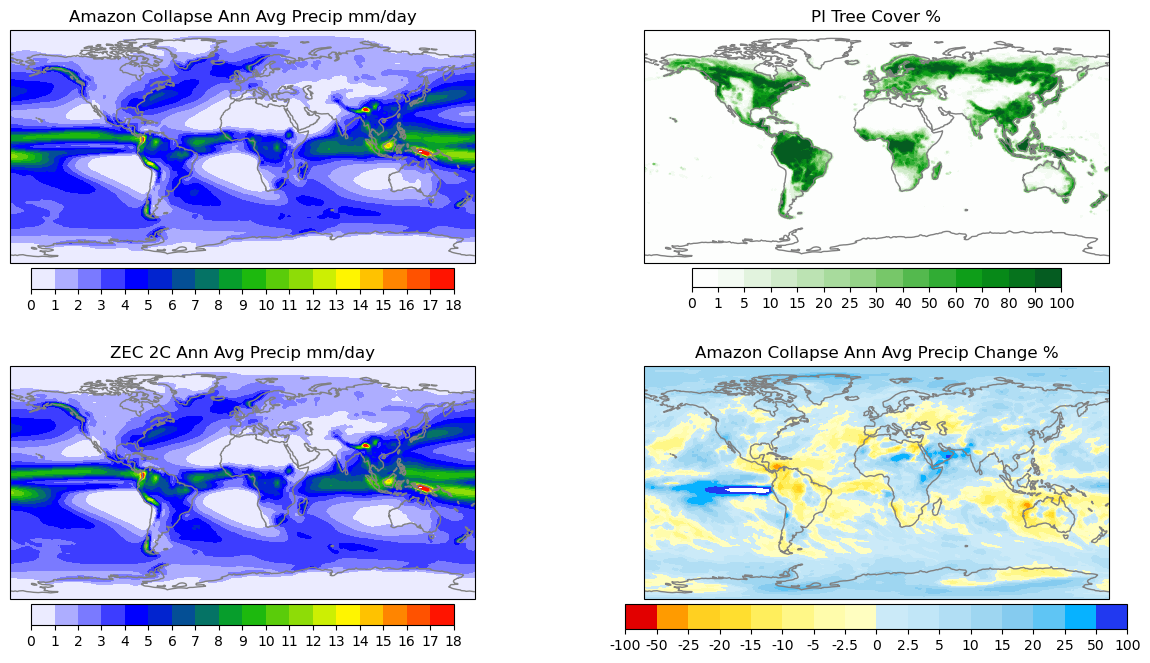

In [58]:
PrecipAmazon_plot_label = "Amazon Collapse Ann Avg Precip mm/day"
Tree_plot_label = "PI Tree Cover %"
PrecipZec_plot_label = "ZEC 2C Ann Avg Precip mm/day"
PrecipDiff_plot_label = "Amazon Collapse Ann Avg Precip Change %"

Precip_fig = plt.figure(figsize=(figWidth,figHeight))

PrecipAmazon_plot_index = 1
Tree_plot_index = 2
PrecipZec_plot_index = 3
PrecipDiff_plot_index = 4

PrecipAmazon_ax = Precip_fig.add_subplot(nplot_rows, nplot_cols, PrecipAmazon_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
PrecipAmazon_cplot = plt.contourf(lons, lats, PrecipAmazon_data,
                     levels = Precip_contour_levels,
                     cmap = Precip_color_map)
PrecipAmazon_ax.coastlines(color = 'grey')
PrecipAmazon_ax.title.set_text(PrecipAmazon_plot_label)

PrecipAmazon_cbar = Precip_fig.colorbar(PrecipAmazon_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
PrecipAmazon_cbar.set_ticks(Precip_contour_levels)
PrecipAmazon_cbar.set_ticklabels(Precip_contour_levels)

Tree_ax = Precip_fig.add_subplot(nplot_rows, nplot_cols, Tree_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
Tree_cplot = plt.contourf(lons, lats, Tree_data,
                     levels = Tree_contour_levels,
                     cmap = Tree_color_map)
Tree_ax.coastlines(color = 'grey')
Tree_ax.title.set_text(Tree_plot_label)

Tree_cbar = Precip_fig.colorbar(Tree_cplot, orientation='horizontal', shrink = 0.7, pad = 0.02)
Tree_cbar.set_ticks(Tree_contour_levels)
Tree_cbar.set_ticklabels(Tree_contour_levels)

PrecipZec_ax = Precip_fig.add_subplot(nplot_rows, nplot_cols, PrecipZec_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
PrecipZec_cplot = plt.contourf(lons, lats, PrecipZec_data,
                     levels = Precip_contour_levels,
                     cmap = Precip_color_map)
PrecipZec_ax.coastlines(color = 'grey')
PrecipZec_ax.title.set_text(PrecipZec_plot_label)

PrecipZec_cbar = Precip_fig.colorbar(PrecipZec_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
PrecipZec_cbar.set_ticks(Precip_contour_levels)
PrecipZec_cbar.set_ticklabels(Precip_contour_levels)

PrecipDiff_ax = Precip_fig.add_subplot(nplot_rows, nplot_cols, PrecipDiff_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
PrecipDiff_cplot = plt.contourf(lons, lats, PrecipDiffPercent_data,
                     levels = PrecipDiff_contour_levels,
                     cmap = PrecipDiff_color_map_reversed)
PrecipDiff_ax.coastlines(color = 'grey')
PrecipDiff_ax.title.set_text(PrecipDiff_plot_label)

PrecipDiff_cbar = Precip_fig.colorbar(PrecipDiff_cplot, orientation='horizontal', shrink = 0.95, pad = 0.02)
PrecipDiff_cbar.set_ticks(PrecipDiff_contour_levels)
PrecipDiff_cbar.set_ticklabels(PrecipDiff_contour_levels)
